In [1]:
# 로지스틱 회귀분석 예제 : # 성별(Sex), 나이(Age). 객실등급(Pclass), 요금(Fare)이 생존에 어느 정도의 영향을 미쳤는가?

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# 데이터 파일 로딩(전처리한 데이터셋)
df = pd.read_csv("../data/titanic/train3.csv")
df.head(3)

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250


In [4]:
# 생존여부를 기준으로 한 평균값들
df.groupby('Survived').mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

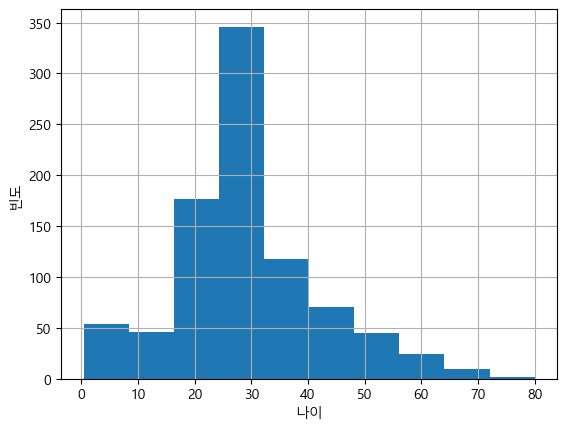

In [5]:
%matplotlib inline
df["Age"].hist()
plt.xlabel("나이")
plt.ylabel("빈도")

Text(0, 0.5, '빈도')

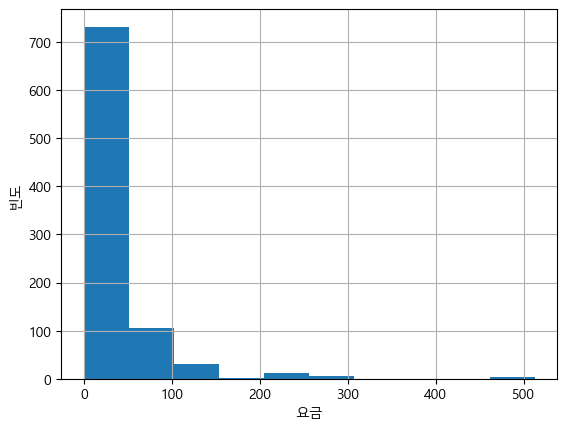

In [6]:
%matplotlib inline
df["Fare"].hist()
plt.xlabel('요금')
plt.ylabel('빈도')

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

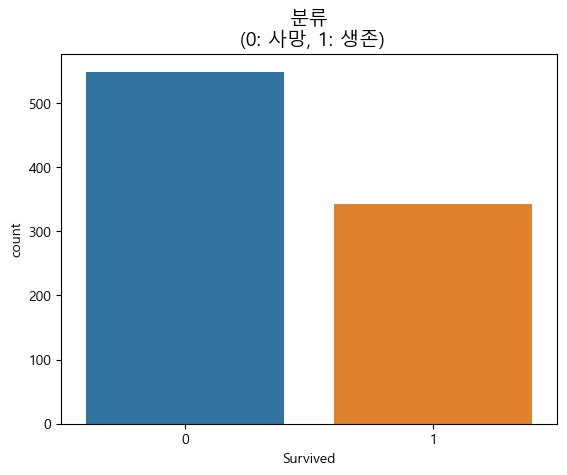

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Survived', data=df)
plt.title("분류\n (0: 사망, 1: 생존)", fontsize=14)
# 불균형 데이터셋

In [8]:
train_cols = df.columns[1:]
X = df[train_cols]
y = df['Survived']
print(type(X), type(y))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [20]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X,y], axis=1)

In [10]:
# #오버샘플링
# from imblearn.over_sampling import SMOTE
# X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
# X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
# y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
# df2=pd.concat([X_samp,y_samp],axis=1)

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.

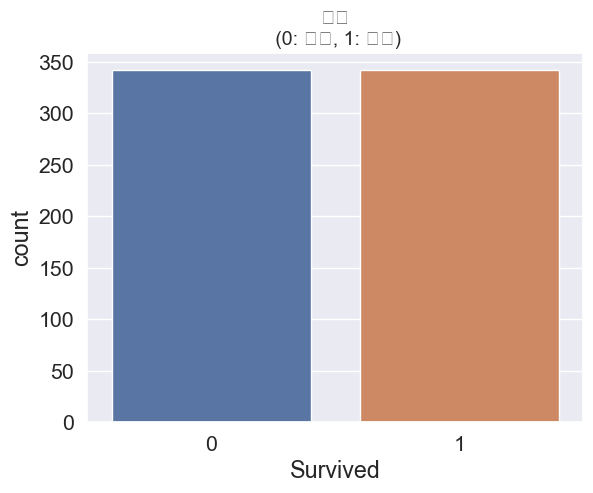

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('Survived', data=df2)
plt.title("분류\n (0: 사망, 1: 생존)", fontsize=14)
train_cols = df.columns[1:]
X = X_samp[train_cols]
y = y_samp['Survived']

In [12]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
print(result.summary2())
# 모델의 설명력 32.2%
# Parch, Fare는 유의하지 않음
# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.
# 성별 : 여성은 생존 확률이 높았다.
# 1등석 > 2등석 > 성별 > 3등석순으로 생존 여부에 영향을 미쳤음

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2023-04-03 12:38 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.7678244972577697
검증용: 0.8029197080291971


In [14]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[56, 13],
       [14, 54]], dtype=int64)

In [15]:
df_cm=pd.DataFrame(cm, index=['사망','생존'],
columns=['사망', '생존'])
df_cm

,사망,생존
사망,56,13
생존,14,54


c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Confusion Matrix'}>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


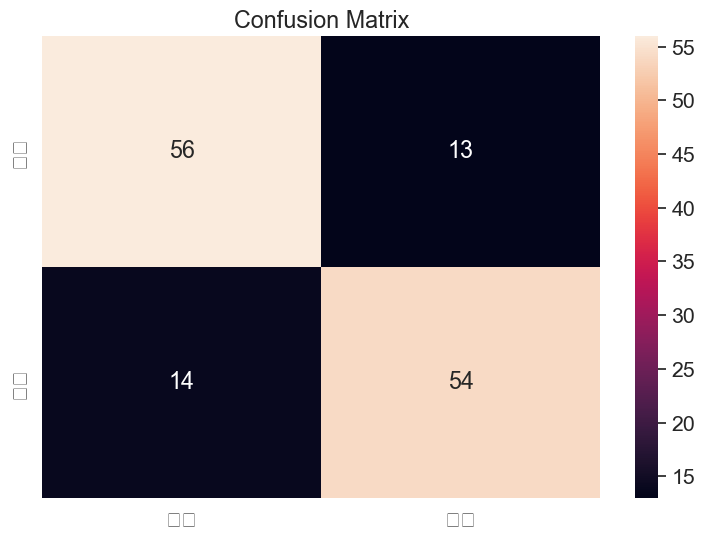

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)

In [23]:
#새로운 값 예측
#1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]
print(model.predict(person1))
print(model.predict_proba(person1)) # 확률로 보기

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]
print(model.predict(person2))
print(model.predict_proba(person2)) # 확률로 보기

#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20
person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]
print(model.predict(person3))
print(model.predict_proba(person3)) # 확률로 보기

[0]
[[0.82781325 0.17218675]]
[1]
[[0.04440744 0.95559256]]
[1]
[[0.21687739 0.78312261]]


c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [18]:
import joblib
joblib.dump(model, '../models/titanic_logit.model')

['../models/titanic_logit.model']